# Lab 2 - Spark SQL
This lab will show you how to work with SparkSQL.  It's meant to be self-guided, but don't hesitate to ask your presentor for help.  

## Step 1 - Getting started: Create a [SQL Context](https://spark.apache.org/docs/1.6.2/api/python/pyspark.sql.html#pyspark.sql.SQLContext)
<br>
 <div class="panel-group" id="accordion-1">
  <div class="panel panel-default">
    <div class="panel-heading">
      <h4 class="panel-title">
        <a data-toggle="collapse" data-parent="#accordion-1" href="#collapse1-1">
        Hint 1</a>
      </h4>
    </div>
    <div id="collapse1-1" class="panel-collapse collapse">
      <div class="panel-body"><i>SQLContext</i> is not included by default.   You need to import it from <i>pyspark.sql</i></div>
    </div>
  </div>
  <div class="panel panel-default">
    <div class="panel-heading">
      <h4 class="panel-title">
        <a data-toggle="collapse" data-parent="#accordion-1" href="#collapse2-1">
        Hint 2</a>
      </h4>
    </div>
    <div id="collapse2-1" class="panel-collapse collapse">
      <div class="panel-body"><i>SQLContext()</i> takes a single parameter which is the current Spark context.</div>
    </div>
  </div>
  <div class="panel panel-default">
    <div class="panel-heading">
      <h4 class="panel-title">
        <a data-toggle="collapse" data-parent="#accordion-1" href="#collapse3-1">
        Hint 3</a>
      </h4>
    </div>
    <div id="collapse3-1" class="panel-collapse collapse">
      <div class="panel-body">Type:<br>

from pyspark.sql import SQLContext<br>
sqlContext = SQLContext(sc)<br></div>
    </div>
  </div>
</div> 


In [1]:
#Import the SparkSQL library and connect to the current Spark context

from pyspark.sql import SQLContext
sqlContext = SQLContext(sc)

## Step 2 - Download a JSON Recordset to work with
Let's download the data, we can run commands on the console of the server (or docker image) that the notebook environment is using. To do so we simply put a "!" in front of the command that we want to run. For example:

!pwd

To get the data we will download a file to the environment. Simple run these two commands, the first just ensures that the file is removed if it exists:

!rm world_bank.json.gz -f <br>
!wget https://raw.githubusercontent.com/bradenrc/sparksql_pot/master/world_bank.json.gz<br><br>
 <div class="panel-group" id="accordion-2">
  <div class="panel panel-default">
    <div class="panel-heading">
      <h4 class="panel-title">
        <a data-toggle="collapse" data-parent="#accordion-1" href="#collapse1-2">
        Advanced Optional 1</a>
      </h4>
    </div>
    <div id="collapse1-2" class="panel-collapse collapse">
      <div class="panel-body">Comment out the rm statement i.e. #!rm and re-run this section.   What is the name of the downloaded file?</div>
    </div>
  </div>
  <div class="panel panel-default">
    <div class="panel-heading">
      <h4 class="panel-title">
        <a data-toggle="collapse" data-parent="#accordion-2" href="#collapse2-2">
        Advanced Optional 2</a>
      </h4>
    </div>
    <div id="collapse2-2" class="panel-collapse collapse">
      <div class="panel-body">Add !ls to see all the files currently in storage.   Try running !mkdir testdir</div>
    </div>
  </div>
  <div class="panel panel-default">
    <div class="panel-heading">
      <h4 class="panel-title">
        <a data-toggle="collapse" data-parent="#accordion-2" href="#collapse3-2">
        Advanced Optional 3</a>
      </h4>
    </div>
    <div id="collapse3-2" class="panel-collapse collapse">
      <div class="panel-body">Clean up all added files/directories.   Use !rmdir to remove a directory.</div>
    </div>
  </div>
</div> 


In [2]:
#Download file here
!rm world_bank.json.gz -f
!wget https://raw.githubusercontent.com/bradenrc/sparksql_pot/master/world_bank.json.gz

--2017-02-09 11:46:23--  https://raw.githubusercontent.com/bradenrc/sparksql_pot/master/world_bank.json.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.48.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.48.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 446287 (436K) [application/octet-stream]
Saving to: ‘world_bank.json.gz’

100%[======================================>] 446,287     --.-K/s   in 0.02s   

2017-02-09 11:46:23 (19.2 MB/s) - ‘world_bank.json.gz’ saved [446287/446287]



## Step 3 - Create a Dataframe 
<br>
Use the <a href="https://spark.apache.org/docs/1.6.2/api/python/pyspark.sql.html#pyspark.sql.SQLContext">SQLContext</a> you created earlier to read the World Bank json data - <i>world_bank.json.gz</i> and return it as a <a href="https://spark.apache.org/docs/1.6.2/api/python/pyspark.sql.html#pyspark.sql.DataFrame">Dataframe</a><br><br>
 <div class="panel-group" id="accordion-3">
  <div class="panel panel-default">
    <div class="panel-heading">
      <h4 class="panel-title">
        <a data-toggle="collapse" data-parent="#accordion-3" href="#collapse1-3">
        Hint 1</a>
      </h4>
    </div>
    <div id="collapse1-3" class="panel-collapse collapse">
      <div class="panel-body">Use the <i>read</i> variable in <i>SQLContext</i> to return a Dataframe reader</div>
    </div>
  </div>
  <div class="panel panel-default">
    <div class="panel-heading">
      <h4 class="panel-title">
        <a data-toggle="collapse" data-parent="#accordion-3" href="#collapse2-3">
        Hint 2</a>
      </h4>
    </div>
    <div id="collapse2-3" class="panel-collapse collapse">
      <div class="panel-body">Use the <i>json()</i> method in Dataframe to read the file.   Note that the method handles a gzipped file format.</div>
    </div>
  </div>
  <div class="panel panel-default">
    <div class="panel-heading">
      <h4 class="panel-title">
        <a data-toggle="collapse" data-parent="#accordion-3" href="#collapse3-3">
        Hint 3</a>
      </h4>
    </div>
    <div id="collapse3-3" class="panel-collapse collapse">
      <div class="panel-body">To create the Dataframe type:<br>

example1_df = sqlContext.read.json("world_bank.json.gz")<br></div>
    </div>
  </div>
  <div class="panel panel-default">
    <div class="panel-heading">
      <h4 class="panel-title">
        <a data-toggle="collapse" data-parent="#accordion-4" href="#collapse4-3">
        Advanced Optional</a>
      </h4>
    </div>
    <div id="collapse4-3" class="panel-collapse collapse">
      <div class="panel-body">Obtain the same result by using <i>textFile()</i> to read the file as RDD and then convert to a Dataframe</div>
    </div>
  </div>
</div> 


In [4]:
#Create the Dataframe here:

df = sqlContext.read.format('json').load("world_bank.json.gz")

 ## Step 3.1 - Show the Dataframe schema
 <br>
 <div class="panel-group" id="accordion-31">
  <div class="panel panel-default">
    <div class="panel-heading">
      <h4 class="panel-title">
        <a data-toggle="collapse" data-parent="#accordion-1" href="#collapse1-31">
        Hint 1</a>
      </h4>
    </div>
    <div id="collapse1-31" class="panel-collapse collapse">
      <div class="panel-body"><h3>We can look at the schema with this command:</h3>

Type: <br>
example1_df.printSchema()</div>
    </div>
  </div>
  <div class="panel panel-default">
    <div class="panel-heading">
      <h4 class="panel-title">
        <a data-toggle="collapse" data-parent="#accordion-31" href="#collapse2-31">
        Advanced Optional 1</a>
      </h4>
    </div>
    <div id="collapse2-31" class="panel-collapse collapse">
      <div class="panel-body">Get the dataframe columns.   Try using command-completion (use TAB after the .) to obtain the list of possible methods/values</div>
    </div>
  </div>
  <div class="panel panel-default">
    <div class="panel-heading">
      <h4 class="panel-title">
        <a data-toggle="collapse" data-parent="#accordion-31" href="#collapse3-31">
        Advanced Optional 2</a>
      </h4>
    </div>
    <div id="collapse3-31" class="panel-collapse collapse">
      <div class="panel-body">Convert the dataframe back to JSON and print the first value</div>
    </div>
  </div>
</div>

In [7]:
#Print out the schema

df.take(1)
#df.printSchema()

[Row(_id=Row($oid=u'52b213b38594d8a2be17c780'), approvalfy=u'1999', board_approval_month=u'November', boardapprovaldate=u'2013-11-12T00:00:00Z', borrower=u'FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA', closingdate=u'2018-07-07T00:00:00Z', country_namecode=u'Federal Democratic Republic of Ethiopia!$!ET', countrycode=u'ET', countryname=u'Federal Democratic Republic of Ethiopia', countryshortname=u'Ethiopia', docty=u'Project Information Document,Indigenous Peoples Plan,Project Information Document', envassesmentcategorycode=u'C', grantamt=0, ibrdcommamt=0, id=u'P129828', idacommamt=130000000, impagency=u'MINISTRY OF EDUCATION', lendinginstr=u'Investment Project Financing', lendinginstrtype=u'IN', lendprojectcost=550000000, majorsector_percent=[Row(Name=u'Education', Percent=46), Row(Name=u'Education', Percent=26), Row(Name=u'Public Administration, Law, and Justice', Percent=16), Row(Name=u'Education', Percent=12)], mjsector_namecode=[Row(code=u'EX', name=u'Education'), Row(code=u'EX', name=u'

## Step 3.2 - Using the Dataframe
<br>
Dataframes are a subset of RDDs and can be similarly transformed.  You can map and filter them.
<br>Take a look at the first two rows of data using the [take()](http://spark.apache.org/docs/latest/api/python/pyspark.sql.html?highlight=take#pyspark.sql.DataFrame.take) function.<br>
<div class="panel-group" id="accordion-1">
  <div class="panel panel-default">
    <div class="panel-heading">
      <h4 class="panel-title">
        <a data-toggle="collapse" data-parent="#accordion-32" href="#collapse1-32">
        Hint 1</a>
      </h4>
    </div>
    <div id="collapse1-32" class="panel-collapse collapse">
      <div class="panel-body">example1_df.take(2)</div>
    </div>
  </div>
  <div class="panel panel-default">
    <div class="panel-heading">
      <h4 class="panel-title">
        <a data-toggle="collapse" data-parent="#accordion-32" href="#collapse2-32">
        Advanced Optional 1</a>
      </h4>
    </div>
    <div id="collapse2-32" class="panel-collapse collapse">
      <div class="panel-body"><i>take()</i> returns data as an RDD list of Row objects.   <i>show()</i> prints the objects to the console.   What is the default number of rows displayed?</div>
    </div>
  </div>
  <div class="panel panel-default">
    <div class="panel-heading">
      <h4 class="panel-title">
        <a data-toggle="collapse" data-parent="#accordion-32" href="#collapse3-32">
        Advanced Optional 2</a>
      </h4>
    </div>
    <div id="collapse3-32" class="panel-collapse collapse">
      <div class="panel-body">Save the table as a parquet table.   Use !ls to confirm it was saved.  Use a <i><a href="https://spark.apache.org/docs/1.6.2/api/python/pyspark.sql.html#pyspark.sql.DataFrameWriter"DataFrameWriter></a></i>  What did you see when you ran the ls command?</div>
    </div>
  </div>
</div> 
 



In [16]:
#Use take on the DataFrame to pull out 2 rows

df.show(2)
#df.take(2)
#df.write.parquet("test.txt", df.show(2))
!ls

+--------------------+----------+--------------------+--------------------+--------------------+--------------------+--------------------+-----------+--------------------+----------------+--------------------+------------------------+--------+-----------+-------+----------+--------------------+--------------------+----------------+---------------+--------------------+--------------------+--------------------+--------------------+-----------+--------+--------------------+---------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+-----------+------+------+--------------------+--------------------+--------------------+---------+---------+------------+--------------------+
|                 _id|approvalfy|board_approval_month|   boardapprovaldate|            borrower|         closingd

## Step 4 - Register a Temp Table
<br>
SQL works on tables.   Currently we have data in a dataframe, but we have no table identifier for it.   Thus, we want to create a temporary table reference that refers to this dataframe.
<br>
<div class="panel-group" id="accordion-4">
  <div class="panel panel-default">
    <div class="panel-heading">
      <h4 class="panel-title">
        <a data-toggle="collapse" data-parent="#accordion-4" href="#collapse1-4">
        Hint 1</a>
      </h4>
    </div>
    <div id="collapse1-4" class="panel-collapse collapse">
      <div class="panel-body">The function is: DataframeObject.registerTempTable("name_of_table")<br>
Create a table named "world_bank"<br></div>
    </div>
  </div>
  <div class="panel panel-default">
    <div class="panel-heading">
      <h4 class="panel-title">
        <a data-toggle="collapse" data-parent="#accordion-4" href="#collapse2-4">
        Hint 2</a>
      </h4>
    </div>
    <div id="collapse2-4" class="panel-collapse collapse">
      <div class="panel-body">example1_df.registerTempTable("world_bank")</div>
    </div>
  </div>
  <div class="panel panel-default">
    <div class="panel-heading">
      <h4 class="panel-title">
        <a data-toggle="collapse" data-parent="#accordion-4" href="#collapse3-4">
        Advanced Optional 1</a>
      </h4>
    </div>
    <div id="collapse3-4" class="panel-collapse collapse">
      <div class="panel-body">Use the <i>tables()</i> method in <i>SQLContext</i> to list all tables and their state.  Extra Hint: show()</div>
    </div>
  </div>
  <div class="panel panel-default">
    <div class="panel-heading">
      <h4 class="panel-title">
        <a data-toggle="collapse" data-parent="#accordion-4" href="#collapse4-4">
        Advanced Optional 2</a>
      </h4>
    </div>
    <div id="collapse4-4" class="panel-collapse collapse">
      <div class="panel-body">Try creating a second temporary table on the same dataframe.   What does <i>tables()</i> return?</div>
    </div>
  </div>
    <div class="panel panel-default">
    <div class="panel-heading">
      <h4 class="panel-title">
        <a data-toggle="collapse" data-parent="#accordion-4" href="#collapse5-4">
        Advanced Optional 3</a>
      </h4>
    </div>
    <div id="collapse5-4" class="panel-collapse collapse">
      <div class="panel-body">Drop the additional temp table.   What does <i>tables()</i> return?</div>
    </div>
  </div>
</div>



In [32]:
#Create the table to be referenced via SparkSQL

df.registerTempTable("world_bank")

## Step 5 - Writing SQL Statements
<br>
Write SQL statements to return two rows from the world_bank table.
<br>
 <div class="panel-group" id="accordion-5">
  <div class="panel panel-default">
    <div class="panel-heading">
      <h4 class="panel-title">
        <a data-toggle="collapse" data-parent="#accordion-5" href="#collapse1-5">
        Hint 1</a>
      </h4>
    </div>
    <div id="collapse1-5" class="panel-collapse collapse">
      <div class="panel-body">Use the <i>sql()</i> method on your SQLContext</div>
    </div>
  </div>
  <div class="panel panel-default">
    <div class="panel-heading">
      <h4 class="panel-title">
        <a data-toggle="collapse" data-parent="#accordion-5" href="#collapse2-5">
        Hint 2</a>
      </h4>
    </div>
    <div id="collapse2-5" class="panel-collapse collapse">
      <div class="panel-body">Use <i>limit</i> (i.e. <i>limit 2</i>) within your SQL statement to limit the number of rows returned.   Use <i>show()</i> to display the values.</div>
    </div>
  </div>
  <div class="panel panel-default">
    <div class="panel-heading">
      <h4 class="panel-title">
        <a data-toggle="collapse" data-parent="#accordion-5" href="#collapse3-5">
        Hint 3</a>
      </h4>
    </div>
    <div id="collapse3-5" class="panel-collapse collapse">
      <div class="panel-body">Type:<br>
      sqlContext.sql("select * from world_bank limit 2").show()<br></div>
    </div>
  </div>
</div> 


In [33]:
#Use SQL to query the table and print the output

sqlContext.sql("select * from world_bank limit 2").show()

+--------------------+----------+--------------------+--------------------+--------------------+--------------------+--------------------+-----------+--------------------+----------------+--------------------+------------------------+--------+-----------+-------+----------+--------------------+--------------------+----------------+---------------+--------------------+--------------------+--------------------+--------------------+-----------+--------+--------------------+---------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+-----------+------+------+--------------------+--------------------+--------------------+---------+---------+------------+--------------------+
|                 _id|approvalfy|board_approval_month|   boardapprovaldate|            borrower|         closingd

### Step 5.1 - Writing SQL Statements
<br>
Try writing the next three sections yourself first.   Each hint contains the solution for that section.   We provide this here because this is more SQL than Spark and not everyone is familar with SQL.  Nor is this an SQL class!
<br><br>
 <div class="panel-group" id="accordion-51">
  <div class="panel panel-default">
    <div class="panel-heading">
      <h4 class="panel-title">
        <a data-toggle="collapse" data-parent="#accordion-51" href="#collapse1-51">
        Hint 1</a>
      </h4>
    </div>
    <div id="collapse1-51" class="panel-collapse collapse">
      <div class="panel-body">sqlContext.sql("select * from world_bank limit 2").toPandas()</div>
    </div>
  </div>
  <div class="panel panel-default">
    <div class="panel-heading">
      <h4 class="panel-title">
        <a data-toggle="collapse" data-parent="#accordion-51" href="#collapse2-51">
        Hint 2</a>
      </h4>
    </div>
    <div id="collapse2-51" class="panel-collapse collapse">
      <div class="panel-body">sqlContext.sql("select regionname, count(*) as regioncount from world_bank group by regionname order by regioncount desc").toPandas()</div>
    </div>
  </div>
  <div class="panel panel-default">
    <div class="panel-heading">
      <h4 class="panel-title">
        <a data-toggle="collapse" data-parent="#accordion-51" href="#collapse3-51">
        Hint 3</a>
      </h4>
    </div>
    <div id="collapse3-51" class="panel-collapse collapse">
      <div class="panel-body">sqlContext.sql("select sector.Name from world_bank limit 5").toPandas()</div>
    </div>
  </div>
</div> 

In [34]:
#Extra credit, take the DataFrame you created with the two records and convert it into a Pandas DataFrame

sqlContext.sql("select * from world_bank limit 2").toPandas()

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
0,"(52b213b38594d8a2be17c780,)",1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,...,"ET,BS,ES,EP",IBRD,Active,N,"(Education for all, 100)","[(65, Education for all)]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...
1,"(52b213b38594d8a2be17c781,)",2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,None,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,...,"BZ,BS",IBRD,Active,N,"(Other economic management, 30)","[(24, Other economic management), (54, Social ...","54,24",0,4700000,http://www.worldbank.org/projects/P144674?lang=en


In [37]:
# Now calculate a simple count based on a group, for example "regionname".   Return the regionname and a count of the values for that regionname. 

sqlContext.sql("select regionname, count(*) as total from world_bank group by regionname order by total desc").toPandas()

,regionname,total
0,Africa,152
1,East Asia and Pacific,100
2,Europe and Central Asia,74
3,South Asia,65
4,Middle East and North Africa,54
5,Latin America and Caribbean,53
6,Other,2


In [38]:
# With JSON data you can reference the nested data.  
# If you look at the Schema above you can see that sector.Name is a nested column.
# Select that column and limit to a reasonable output (say five rows)

sqlContext.sql("select sector.Name from world_bank limit 5").toPandas()

,Name
0,"[Primary education, Secondary education, Publi..."
1,"[Public administration- Other social services,..."
2,[Rural and Inter-Urban Roads and Highways]
3,[Other social services]
4,"[General industry and trade sector, Other indu..."


## Step 6 - Creating Simple Graphs
<br>
Create some simple graphs using the [matplotlib](http://matplotlib.org/1.5.3/index.html) and [numpy](http://www.numpy.org/) libraries
<br>
The "%matplotlib inline" statement is used to ensure that graphs are drawn within the notebook instead of popping up as separate windows.

Make SURE you actually run this cell!

In [39]:
# Load the libraries
%matplotlib inline 
import matplotlib.pyplot as plt, numpy as np

### Step 6.1 - Create the SQL data
Write the sql statement and look at the data, remember to add <i>.toPandas()</i> for a formatted display. An easier option is to create a variable and set it to the SQL statement.
#### First create a SQL statement that is a reasonable number of items
For example, you can count the number of projects (rows) by countryname
<br>or in other words: 
<br>count(*), countryname from table group by countryname<br><br>

 <div class="panel-group" id="accordion-61">
  <div class="panel panel-default">
    <div class="panel-heading">
      <h4 class="panel-title">
        <a data-toggle="collapse" data-parent="#accordion-61" href="#collapse1-61">
        Hint 1</a>
      </h4>
    </div>
    <div id="collapse1-61" class="panel-collapse collapse">
      <div class="panel-body">Type:<br>
query = "select count(*) as Count, countryname from world_bank group by countryname"<br></div>
    </div>
  </div>
  <div class="panel panel-default">
    <div class="panel-heading">
      <h4 class="panel-title">
        <a data-toggle="collapse" data-parent="#accordion-61" href="#collapse2-61">
        Hint 2</a>
      </h4>
    </div>
    <div id="collapse2-61" class="panel-collapse collapse">
      <div class="panel-body">Type:<br>
      chart1_df = sqlContext.sql(query).toPandas()<br>
print chart1_df<br></div>
    </div>
  </div>
  <div class="panel panel-default">
    <div class="panel-heading">
      <h4 class="panel-title">
        <a data-toggle="collapse" data-parent="#accordion-61" href="#collapse3-61">
        Advanced Optional 1</a>
      </h4>
    </div>
    <div id="collapse3-61" class="panel-collapse collapse">
      <div class="panel-body">Printing the result isn't as nicely formatted.   What command gives you a nicely formatted output?   Use that instead.</div>
    </div>
  </div>
</div> 


In [42]:
# create the query to obtain the number of projects by countryname, save to a variable and print that variable

query = "select count(*) as count, countryname from world_bank group by countryname"
result = sqlContext.sql(query).toPandas()
print result

     count                              countryname
0        1                        Republic of Chile
1        4                       Republic of Uganda
2        4  Federal Democratic Republic of Ethiopia
3        3                       Kingdom of Lesotho
4        1                    East Asia and Pacific
5        3              Republic of the Philippines
6        1              People's Republic of Angola
7        2       Democratic Republic of Timor-Leste
8        1                      Republic of Namibia
9        1                                   Tuvalu
10       1                         Republic of Chad
11       1                      Kingdom of Thailand
12       9             Islamic Republic of Pakistan
13      11                   Republic of Mozambique
14       6         Democratic Republic of the Congo
15       1                     Republic of Zimbabwe
16       2                                 Mongolia
17       4                        Republic of Benin
18       4  

### Step 6.2 - Create charts based on the SQL data
<br>
Here we wish to create a chart based on the SQL data we just obtained.   Python is an excellent choice when you need to create charts because of the variety and power of the charting libraries available.   The one we are using here is for Pandas.   Specifically the plot() method.   Documentation can be found <a href="http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html">here</a>.

 <div class="panel-group" id="accordion-62">
  <div class="panel panel-default">
    <div class="panel-heading">
      <h4 class="panel-title">
        <a data-toggle="collapse" data-parent="#accordion-1" href="#collapse1-62">
        Hint 1</a>
      </h4>
    </div>
    <div id="collapse1-62" class="panel-collapse collapse">
      <div class="panel-body">Type:<br>
      chart1_df.plot(kind='bar', x='countryname', y='Count', figsize=(12, 5))</div>
    </div>
  </div>
  <div class="panel panel-default">
    <div class="panel-heading">
      <h4 class="panel-title">
        <a data-toggle="collapse" data-parent="#accordion-62" href="#collapse2-62">
       Advanced Optional 1</a>
      </h4>
    </div>
    <div id="collapse2-62" class="panel-collapse collapse">
      <div class="panel-body">The table contains too much data.   Change the SQL statement to return a smaller group of values like 30 or 40<br></div>
    </div>
  </div>
  <div class="panel panel-default">
    <div class="panel-heading">
      <h4 class="panel-title">
        <a data-toggle="collapse" data-parent="#accordion-62" href="#collapse3-62">
        Advanced Optional 2</a>
      </h4>
    </div>
    <div id="collapse3-62" class="panel-collapse collapse">
      <div class="panel-body">Looking at the Pandas <i>plot()</i> documentation try other styles of plotting.   Look <a href="http://pandas.pydata.org/pandas-docs/version/0.18.1/visualization.html">here</a> for ideas.<br></div>
    </div>
  </div>
</div> 


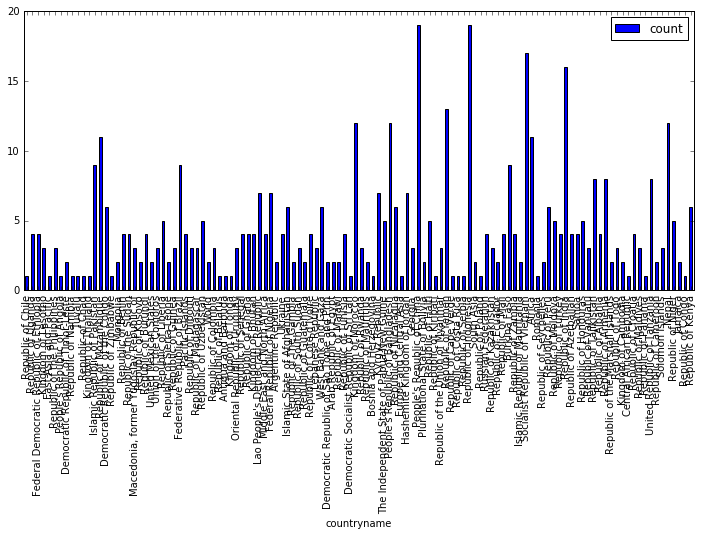

In [45]:
# Now take the variable (or same sql statement) and use the method:
# .plot(kind='bar', x='countryname', y='Count', figsize=(12, 5)) to plot a graph

result.plot(kind='bar', x='countryname', y='count', figsize=(12, 5))

## Step 7 - Creating a DataFrame
<br>
Not all data comes with a defined (or derivable) schema like JSON.   Sometimes we have the data first and <b>then</b> need to create a schema for it.<br>
Try adding a schema to an RDD to create a DataFrame.<br>
First, you need to create an RDD. This can be done with a loop or as
seen in the instructor's example, or more simply by assigning values to an array.
<br><br>

In [46]:
# Default array defined below. Feel free to change as desired.
array=[[1,1,1],[2,2,2],[3,3,3],["4a","4a","4a"],[5,5,5]]
my_rdd = sc.parallelize(array)
my_rdd.collect()

[[1, 1, 1], [2, 2, 2], [3, 3, 3], ['4a', '4a', '4a'], [5, 5, 5]]

### Step 7.1 - Second, you need to add a schema to the RDD you created in the previous code block.
Use first the StructField method, following these steps:<br>
1- Define your schema columns as a string<br>
2- Build the schema object using StructField<br>
3- Apply the schema object to the RDD<br>

Note: The cell below is missing some code and will not run properly until you add in some missing parts.
<br><br>
<div class="panel-group" id="accordion-71">
  <div class="panel panel-default">
    <div class="panel-heading">
      <h4 class="panel-title">
        <a data-toggle="collapse" data-parent="#accordion-71" href="#collapse1-71">
        Hint 1</a>
      </h4>
    </div>
    <div id="collapse1-71" class="panel-collapse collapse">
      <div class="panel-body">The schema string is simply the space-separated list of column names (i.e. "var1 var2 var3")<br></div>
    </div>
  </div>
  <div class="panel panel-default">
    <div class="panel-heading">
      <h4 class="panel-title">
        <a data-toggle="collapse" data-parent="#accordion-71" href="#collapse2-71">
        Hint 2</a>
      </h4>
    </div>
    <div id="collapse2-71" class="panel-collapse collapse">
      <div class="panel-body">The type should be IntegerType or StringType.   Note that because we are applying this is a loop *everything* will be an Integer or String<br></div>
    </div>
  </div>
  <div class="panel panel-default">
    <div class="panel-heading">
      <h4 class="panel-title">
        <a data-toggle="collapse" data-parent="#accordion-71" href="#collapse3-71">
        Hint 3</a>
      </h4>
    </div>
    <div id="collapse3-71" class="panel-collapse collapse">
      <div class="panel-body">Use the RDD you created above and apply the schema to it i.e.<br>
      schemaExample = sqlContext.createDataFrame(my_rdd, schema)
      </div>
    </div>
  </div>
    <div class="panel panel-default">
    <div class="panel-heading">
      <h4 class="panel-title">
        <a data-toggle="collapse" data-parent="#accordion-71" href="#collapse4-71">
        Hint 4</a>
      </h4>
    </div>
    <div id="collapse4-71" class="panel-collapse collapse">
      <div class="panel-body">We really don't need to tell you a name to use for your temp table do we?</div>
    </div>
  </div>
</div> 


In [47]:
from pyspark.sql.types import *

# The schema is encoded in a string. Complete the string below
schemaString = "var1 var2 var3"

# MissingType() should be either StringType() or IntegerType(). Please replace as required.
fields = [StructField(field_name, StringType(), True) for field_name in schemaString.split()]
schema = StructType(fields)

# Apply the schema to the RDD.
schemaExample = sqlContext.createDataFrame(my_rdd, schema)

# Register the DataFrame as a table. Add table name below as parameter to registerTempTable.
schemaExample.registerTempTable("myRDDTempTable")


### Step 7.2 - Thirdly, write some SQL statements to verify that you successfully added a schema to your RDD
<br>
 <div class="panel-group" id="accordion-72">
  <div class="panel panel-default">
    <div class="panel-heading">
      <h4 class="panel-title">
        <a data-toggle="collapse" data-parent="#accordion-72" href="#collapse1-72">
        Hint 1</a>
      </h4>
    </div>
    <div id="collapse1-72" class="panel-collapse collapse">
      <div class="panel-body">sqlContext.sql("select * from myRDDTempTable").toPandas()</div>
    </div>
  </div>
  <div class="panel panel-default">
    <div class="panel-heading">
      <h4 class="panel-title">
        <a data-toggle="collapse" data-parent="#accordion-72" href="#collapse2-72">
        Advanced Optional 1</a>
      </h4>
    </div>
    <div id="collapse2-72" class="panel-collapse collapse">
      <div class="panel-body">What is the type is changed to IntegerType (or StringType).   Any change in the results?</div>
    </div>
  </div>
  <div class="panel panel-default">
    <div class="panel-heading">
      <h4 class="panel-title">
        <a data-toggle="collapse" data-parent="#accordion-72" href="#collapse3-72">
        Advanced Optional 2</a>
      </h4>
    </div>
    <div id="collapse3-72" class="panel-collapse collapse">
      <div class="panel-body">Try to do some specific queries on the data (i.e.)<br>
      sqlContext.sql("select * from myRDDTempTable where var3 > 2").toPandas()<br>
      Does this work regardless of the data type (i.e. IntegerType or StringType)?<br>
      What if you change some of the input values (i.e. change all 4s to "4a")<br></div>
    </div>
  </div>
</div> 

In [48]:
#Run some SQL statements on your newly created DataFrame and display the output
#sqlContext.sql("select * from myRDDTempTable").toPandas()

sqlContext.sql("select * from myRDDTempTable").toPandas()

,var1,var2,var3
0,1,1,1
1,2,2,2
2,3,3,3
3,4a,4a,4a
4,5,5,5


## Step 8
### Reading from an external data source
If you have time, this is a good example to show you how to read from other datasources.  <br><br>
In a different browser tab, create a dashDB service, add credentials and come back to this notebook. <br>If you are using Data Science Experience, you need to log into Bluemix and create a dashDB instance.   The login and password should be the same as for DSE.<br>
Each dashDB instance in Bluemix is created with a "GOSALES" set of tables which we can reuse for the purpose of this example. (You can create your own tables if you wish...)<br><br>Replace the Xs in the cell below with proper credentials and verify access to dashDB tables.<br><br>
You can read from any database that you can connect to through jdbc.  Here is the [documentation](http://spark.apache.org/docs/latest/sql-programming-guide.html#jdbc-to-other-databases)
<br><br>
 <div class="panel-group" id="accordion-8">
  <div class="panel panel-default">
    <div class="panel-heading">
      <h4 class="panel-title">
        <a data-toggle="collapse" data-parent="#accordion-8" href="#collapse1-8">
        Hint 1</a>
      </h4>
    </div>
    <div id="collapse1-8" class="panel-collapse collapse">
      <div class="panel-body">To connect to a general dashDB instance:<br>
      url=""<br>
user=""<br>
password=""<br>
connection="jdbc:db2://" + url + ":50000/BLUDB:user=" + user + ";password=" + password + ";"<br></div>
    </div>
  </div>
  <div class="panel panel-default">
    <div class="panel-heading">
      <h4 class="panel-title">
        <a data-toggle="collapse" data-parent="#accordion-8" href="#collapse2-8">
        Advanced Optional</a>
      </h4>
    </div>
    <div id="collapse2-8" class="panel-collapse collapse">
      <div class="panel-body">Create your own dashDB instance in Bluemix and connect to it</div>
    </div>
  </div>
</div> 


In [51]:

url="bluemix05.bluforcloud.com"
user="dash111924"
password="989b62e5abde"
connection="jdbc:db2://" + url + ":50000/BLUDB:user=" + user + ";password=" + password + ";"

salesDF = sqlContext.read.format('jdbc').\
          options(url=connection,\
                  dbtable='GOSALES.BRANCH').load()
salesDF.show()


+-----------+--------------------+--------------------+-----------------+-----------------+----------------+----------------+-------------+-------------+-----------+------------+-----------------+---------------------+
|BRANCH_CODE|            ADDRESS1|         ADDRESS1_MB|         ADDRESS2|      ADDRESS2_MB|            CITY|         CITY_MB|   PROV_STATE|PROV_STATE_MB|POSTAL_ZONE|COUNTRY_CODE|ORGANIZATION_CODE|WAREHOUSE_BRANCH_CODE|
+-----------+--------------------+--------------------+-----------------+-----------------+----------------+----------------+-------------+-------------+-----------+------------+-----------------+---------------------+
|          6|75, rue du Faubou...|75, rue du Faubou...|             null|             null|           Paris|           Paris|         null|         null|    F-75008|        6001|              006|                   38|
|          7|     Piazza Duomo, 1|     Piazza Duomo, 1|             null|             null|          Milano|          Milano

In [52]:
salesDF.printSchema()

root
 |-- BRANCH_CODE: integer (nullable = false)
 |-- ADDRESS1: string (nullable = false)
 |-- ADDRESS1_MB: string (nullable = true)
 |-- ADDRESS2: string (nullable = true)
 |-- ADDRESS2_MB: string (nullable = true)
 |-- CITY: string (nullable = false)
 |-- CITY_MB: string (nullable = false)
 |-- PROV_STATE: string (nullable = true)
 |-- PROV_STATE_MB: string (nullable = true)
 |-- POSTAL_ZONE: string (nullable = false)
 |-- COUNTRY_CODE: integer (nullable = false)
 |-- ORGANIZATION_CODE: string (nullable = false)
 |-- WAREHOUSE_BRANCH_CODE: integer (nullable = false)



In [54]:
salesDF.describe()

DataFrame[summary: string, BRANCH_CODE: string, COUNTRY_CODE: string, WAREHOUSE_BRANCH_CODE: string]

In [55]:
salesDF.toPandas()

,BRANCH_CODE,ADDRESS1,ADDRESS1_MB,ADDRESS2,ADDRESS2_MB,CITY,CITY_MB,PROV_STATE,PROV_STATE_MB,POSTAL_ZONE,COUNTRY_CODE,ORGANIZATION_CODE,WAREHOUSE_BRANCH_CODE
0,6,"75, rue du Faubourg St-Honoré","75, rue du Faubourg St-Honoré",None,None,Paris,Paris,None,None,F-75008,6001,006,38
1,7,"Piazza Duomo, 1","Piazza Duomo, 1",None,None,Milano,Milano,None,None,I-20121,7006,007,7
2,9,Singelgravenplein 4,Singelgravenplein 4,4e verdieping,4e verdieping,Amsterdam,Amsterdam,Noord-Holland,Noord-Holland,1233 BW,5007,009,15
3,13,Schwabentor 35,Schwabentor 35,None,None,Hamburg,Hamburg,None,None,D-22529,6002,013,38
4,14,Leopoldstraße 36,Leopoldstraße 36,None,None,München,München,None,None,D-81241,6002,014,38
5,15,Isafjordsgatan 30 C,Isafjordsgatan 30 C,None,None,Kista,Kista,None,None,S-164 40,5010,015,15
6,17,"7800, 756 - 6th Avenue. S.W.","7800, 756 - 6th Avenue. S.W.",None,None,Calgary,Calgary,Alberta,Alberta,T2P 3Z0,1004,017,17
7,18,789 Yonge Street,789 Yonge Street,None,None,Toronto,Toronto,Ontario,Ontario,M2M 4K8,1004,018,19
8,19,1288 Dorchester Avenue,1288 Dorchester Avenue,None,None,Boston,Boston,Massachusetts,Massachusetts,02133,1003,019,19
9,20,299 Yale Avenue,299 Yale Avenue,None,None,Seattle,Seattle,Washington,Washington,98139,1003,020,17
